[View in Colaboratory](https://colab.research.google.com/github/jrstevenjlab/ColaboratoryAtomicLab/blob/master/DoubleSlit.ipynb)

The goal of the excercise is to fit the function 

$$V_{model}(x) = a \cdot x + b $$

to your data for Skittle volume as a function of distance that you recorded in lab.  The parameters of the function are:

*   a: slope of function vs. group number (expect a=0),
*   b: Skittle volume averaged over all groups

By "fitting" the data we mean that the parameters of the model are allowed to vary until the curve defined by this function best match the data you've measured.  This is done by minimizing the $\chi^2$ which is a metric for comparing the model function to the observed data.  The $\chi^2$ is defined as

$$\chi^{2} = \sum_{i=0} \frac{(V_i - V_{model}(x_i))^2}{\sigma_{V_{i}}^2}$$

where the sum of $i$ is over each group's data points
*  $V_i$ are the individual group data points for Skittle volume (y-axis value), 
*  $\sigma_{V_{i}}$ are the errors on the individual data points,
*  and $V_{model}(x_i)$ is the value of your model function for group number $x_i$

The steps below describe the process that you should follow:

1.   Upload [SkittlesData.xlsx](https://blackboard.wm.edu/bbcswebdav/pid-722048-dt-content-rid-7992412_1/xid-7992412_1) to your Google Drive.
2.   Run the fit code by pressing the "Play" button, which will cause a few things to happen:
> * You will be prompted to enter an authorization code, which appears in a new browser window (be sure to allow pop-ups).  This gives the Python code access to the files in your Google Drive.
> * The data will be plotted for all the groups in the figure below the code 
> * The `curve_fit` command in the code will find the "best fit" values for the paremeters of the model which gives the smallest value for the $\chi^2$ possible (ie. it "minimizes" the $\chi^2$).
> * The function $V_{model}(x)$ with these "best fit" parameters will be plotted in red overlayed with your data points
> * The values for the parameters are output as text below the figure, along with the uncertainties on those parameters.





[1.92, 2.02, 2.12, 2.22, 2.32, 2.42, 2.52, 2.62, 2.72, 2.82, 2.92, 3.02, 3.12, 3.22, 3.32, 3.42, 3.52, 3.62, 3.72, 3.82, 3.92, 4.02, 4.12, 4.22, 4.32, 4.42, 4.52, 4.62, 4.72, 4.72, 4.82, 4.82, 4.92, 5.02, 5.12, 5.22, 5.32, 5.42, 5.52, 5.62, 5.72, 5.82, 5.92, 6.02, 6.12, 6.22, 6.32, 6.42, 6.52, 6.62, 6.72, 6.82, 6.92, 7.02, 7.12, 7.22, 7.32, 7.42, 7.52, 7.62, 7.72, 7.82, 7.92, 8.02]
[0.06, 0.08, 0.1, 0.1, 0.07, 0.05, 0.03, 0.05, 0.15, 0.3, 0.39, 0.44, 0.38, 0.24, 0.15, 0.02, 0.1, 0.3, 0.57, 0.82, 0.9, 0.78, 0.5, 0.19, 0.02, 0.07, 0.34, 0.69, 1.18, 1, 1.12, 1.13, 0.86, 0.47, 0.15, 0.02, 0.12, 0.42, 0.74, 0.95, 0.95, 0.75, 0.45, 0.18, 0.04, 0.06, 0.2, 0.36, 0.46, 0.46, 0.36, 0.23, 0.11, 0.04, 0.03, 0.05, 0.08, 0.09, 0.09, 0.06, 0.04, 0.02, 0.01, 0.01]
[79.6, 81, 83.5, 91.6, 100.6, 130.4, 127.8, 122.2, 93.5, 91.9, 155.2, 281.4, 401.7, 424.7, 338.8, 203.9, 73, 103.7, 317, 657, 870, 808, 522, 211, 72.2, 232, 596, 1006, 1154, 1160, 1049, 1069, 751.5, 331, 117, 197, 505, 842, 984, 844, 528, 25

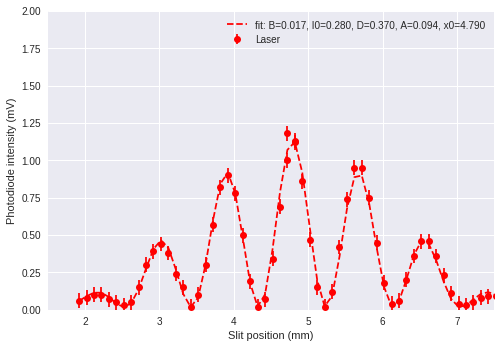

Model parameters:
B   = 0.017258415216977827  +/-  0.010549233289954676
I0  = 0.27952637617031784  +/-  0.005244451149622424
D   = 0.37021047121367845  +/-  0.0015296972848357017
A   = 0.09426043630253406  +/-  0.0021591164896868275
x0  = 4.789732035479838  +/-  0.0036725956996419597

Fit quality:
chisq = 32.03630835051362 dof = 59


In [40]:
# import modules needed for data analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# import modules for reading data from Google Sheets
!pip install --upgrade -q gspread
import gspread
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

# function for detected intensity vs position
def IntensityModel(x, B, I0, D, A, x0):
  L=500 # distance between slits in (mm)
  #l=546e-6; # green bulb wavelength (mm)
  l=670e-6; # laser wavelength (mm)
  C=np.pi/(l*L);
  return B+4*I0*np.power(np.cos(C*D*(x-x0)),2.0) * np.power(np.sin(C*A*(x-x0))+1e-9,2.0) / np.power((C*A*(x-x0))+1e-9,2.0)

########################
# LOAD YOUR DATA HERE! #
########################

# Open our new sheet and read some data.  Upload the file to Google Drive main folder for access
worksheet = gc.open("DoubleSlitAll").sheet1

# Wednesday afternoon data
x=worksheet.col_values(1,'UNFORMATTED_VALUE')[1:] # first column is position (x-axis variable)
ylaser=worksheet.col_values(2,'UNFORMATTED_VALUE')[1:] # second column is laser data (y-axis variable)
ybulb=worksheet.col_values(3,'UNFORMATTED_VALUE')[1:] # thrid column is bulb data (y-axis variable)

# check that data from spreadsheet is in the right format
print(x)
print(ylaser)
print(ybulb)

eylaser_value = 0.05
eylaser = np.repeat(eylaser_value, len(ylaser)) 

# plot the data on a new figure
plt.figure() # create new figure for plotting
plt.errorbar(x, ylaser, eylaser, fmt='or', label="Laser") # plot intensity vs position
plt.axis([1.5, 7.5, 0, 2.0])  # set axes [xmin, xmax, ymin, ymax]
plt.xlabel('Slit position (mm)') # set x-axis label
plt.ylabel('Photodiode intensity (mV)') # set y-axis label 

# fit the data
initialParameters = [0.01,1.200,0.356,0.085,4.78] # start with initial guess for fit parameters (B, I0, D, A, x0)
finalParameters, finalParameterErrors = curve_fit(IntensityModel, x, ylaser, initialParameters, eylaser, True) #

# show red curve for fit results and plot on top of the data
plt.plot(x, IntensityModel(x, *finalParameters), 'r--', label='fit: B=%5.3f, I0=%5.3f, D=%5.3f, A=%5.3f, x0=%5.3f' % tuple(finalParameters))
plt.legend()
plt.show()

# output fit parameter values and errors
print("Model parameters:")
print("B   =", finalParameters[0], " +/- ",np.sqrt(finalParameterErrors[0,0]))
print("I0  =", finalParameters[1], " +/- ",np.sqrt(finalParameterErrors[1,1]))
print("D   =", finalParameters[2], " +/- ",np.sqrt(finalParameterErrors[2,2]))
print("A   =", finalParameters[3], " +/- ",np.sqrt(finalParameterErrors[3,3]))
print("x0  =", finalParameters[4], " +/- ",np.sqrt(finalParameterErrors[4,4]))

# compare model function with obtained parameters to data to determine fit quality
IntensityModel_i = IntensityModel(x, *finalParameters)
deltaIntensity = ylaser - IntensityModel_i # calculate difference between data and model
chisq = np.sum((deltaIntensity/eylaser)**2) # calculate chi^2 by summing over difference for all data points
dof = len(x) - len(finalParameters) # Degrees of Freedom = # data points - # parameters
print("\nFit quality:")
print("chisq =",chisq,"dof =",dof)